In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os

import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
def spanish_method(iso2,sym):
    df = pd.read_csv(iso2+'.csv')
    df1 = df[df['B7.1']==1]
    df2 = df1[df1['B8.NA']==0]
    df_filter = df2[df2['B8.3']==0]
    
    column_drop = ["B1_1.NA","B1_2.NA","B1_3.NA","B1_4.NA","B1_7.NA","B1_10.NA","B1_12.NA","B1_13.NA"]
    for column in column_drop:
        df_filter = df_filter[df_filter[column] != 1]
    
    list_risk = []
    for i in range(len(df_filter.index)):
        risk= 1*df_filter['B1_4.1'][df_filter.index[i]] + 2*df_filter['B1_1.1'][df_filter.index[i]] + 5*df_filter['B1_10.1'][df_filter.index[i]]
        list_risk.append(risk)
    df_filter['risk']=list_risk
    
    
    list_sum_sym=[]
    for i in range(len(df_filter.index)):
        sum_sym= np.sum(df_filter['B1_4.1'][df_filter.index[i]]+df_filter['B1_10.1'][df_filter.index[i]]+df_filter['B1_3.1'][df_filter.index[i]]+df_filter['B1_13.1'][df_filter.index[i]]+df_filter['B1_1.1'][df_filter.index[i]]+df_filter['B1_7.1'][df_filter.index[i]]+df_filter['B1_2.1'][df_filter.index[i]]+df_filter['B1_12.1'][df_filter.index[i]])
        list_sum_sym.append(sum_sym)
    df_filter['sum_sym']=list_sum_sym
    

    list_sm = []
    for i in range(len(df_filter.index)):
        if (df_filter['risk'][df_filter.index[i]]>=3  and df_filter['sum_sym'][df_filter.index[i]]>=sym):
            list_sm.append(1)
        else:
            list_sm.append(0)
    df_filter['spanish_method'] = list_sm
    
    Y_test = df_filter['B8.1']
    y_pred = df_filter['spanish_method']

    print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
    print(f'Recall score: {recall_score(Y_test,y_pred)}')
    print("")
    matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(Y_test,y_pred)}')
    print(f'Precision score: {precision_score(Y_test,y_pred)}')
    print(matrix)
    print("")
    print(classification_report(Y_test, y_pred))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()

### Testing

Accuracy Score: 0.9057608920090853
Area Under Curve: 0.6756469597563941
Recall score: 0.37160326086956524

Specificity: 0.9796906586432231
F1 score: 0.48948545861297543
Precision score: 0.7169069462647444
[[62517  1296]
 [ 5550  3282]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     63813
           1       0.72      0.37      0.49      8832

    accuracy                           0.91     72645
   macro avg       0.82      0.68      0.72     72645
weighted avg       0.89      0.91      0.89     72645



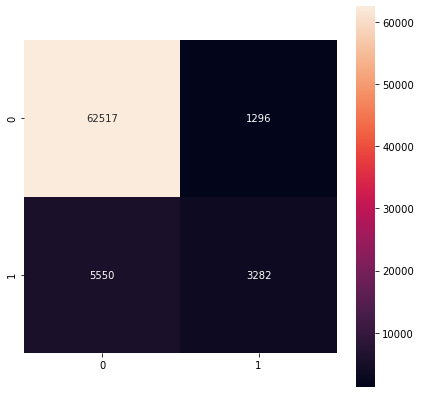

In [5]:
spanish_method('ES',3)

Accuracy Score: 0.901369674444215
Area Under Curve: 0.6444178603506237
Recall score: 0.3049139492753623

Specificity: 0.983921771425885
F1 score: 0.42912915305553345
Precision score: 0.724119386931971
[[62787  1026]
 [ 6139  2693]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     63813
           1       0.72      0.30      0.43      8832

    accuracy                           0.90     72645
   macro avg       0.82      0.64      0.69     72645
weighted avg       0.89      0.90      0.88     72645



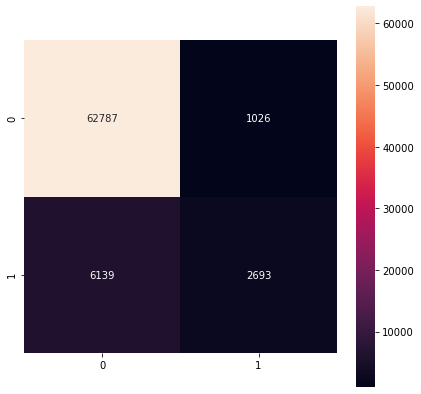

In [6]:
spanish_method('ES',4)

Accuracy Score: 0.9718768844680242
Area Under Curve: 0.6963313113557252
Recall score: 0.40628808189129906

Specificity: 0.9863745408201514
F1 score: 0.4193183247390266
Precision score: 0.4332120582120582
[[315774   4362]
 [  4872   3334]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    320136
           1       0.43      0.41      0.42      8206

    accuracy                           0.97    328342
   macro avg       0.71      0.70      0.70    328342
weighted avg       0.97      0.97      0.97    328342



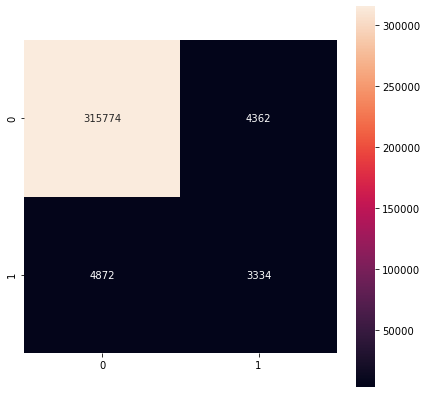

In [7]:
spanish_method('DE',3)

Accuracy Score: 0.9736737913517004
Area Under Curve: 0.6622249727085584
Recall score: 0.33438947111869366

Specificity: 0.9900604742984231
F1 score: 0.38833852250212286
Precision score: 0.4630442119473507
[[316954   3182]
 [  5462   2744]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    320136
           1       0.46      0.33      0.39      8206

    accuracy                           0.97    328342
   macro avg       0.72      0.66      0.69    328342
weighted avg       0.97      0.97      0.97    328342



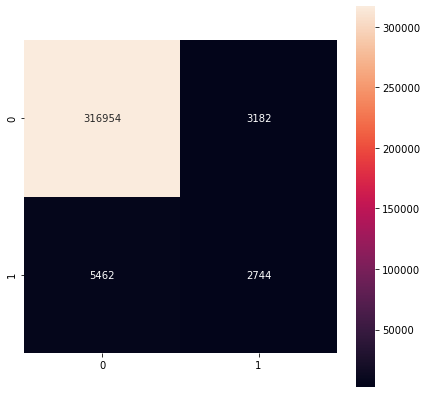

In [8]:
spanish_method('DE',4)

Accuracy Score: 0.9288091500988257
Area Under Curve: 0.7016673033661379
Recall score: 0.4312710093576815

Specificity: 0.9720635973745942
F1 score: 0.4921465968586387
Precision score: 0.5730323515210043
[[123072   3537]
 [  6260   4747]]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    126609
           1       0.57      0.43      0.49     11007

    accuracy                           0.93    137616
   macro avg       0.76      0.70      0.73    137616
weighted avg       0.92      0.93      0.92    137616



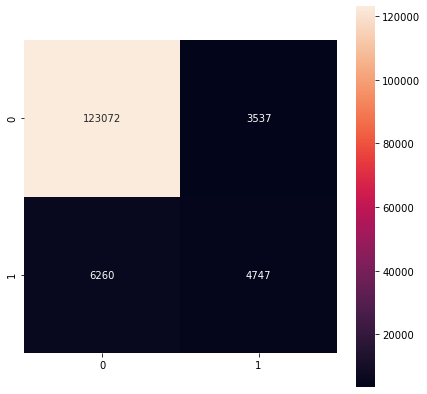

In [9]:
spanish_method('FR',3)

Accuracy Score: 0.9295430763864667
Area Under Curve: 0.6766410918913397
Recall score: 0.37557917688743525

Specificity: 0.9777030068952444
F1 score: 0.46025384101536404
Precision score: 0.5942216472617508
[[123786   2823]
 [  6873   4134]]

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    126609
           1       0.59      0.38      0.46     11007

    accuracy                           0.93    137616
   macro avg       0.77      0.68      0.71    137616
weighted avg       0.92      0.93      0.92    137616



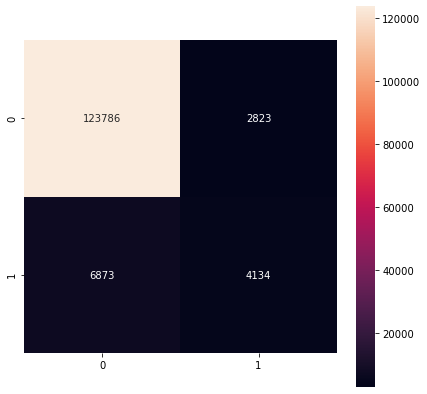

In [10]:
spanish_method('FR',4)

Accuracy Score: 0.8234132944256104
Area Under Curve: 0.6677591109926375
Recall score: 0.3732614869292944

Specificity: 0.9622567350559804
F1 score: 0.49913581148518715
Precision score: 0.7531036509219129
[[85688  3361]
 [17214 10252]]

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     89049
           1       0.75      0.37      0.50     27466

    accuracy                           0.82    116515
   macro avg       0.79      0.67      0.70    116515
weighted avg       0.81      0.82      0.80    116515



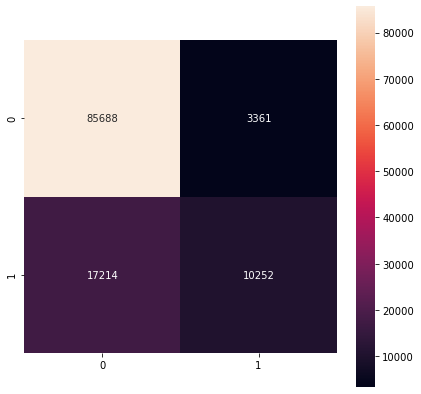

In [11]:
spanish_method('IN',3)

Accuracy Score: 0.8201347465991503
Area Under Curve: 0.650972706724726
Recall score: 0.3309182261705381

Specificity: 0.9710271872789139
F1 score: 0.4644946978408075
Precision score: 0.778901362584626
[[86469  2580]
 [18377  9089]]

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     89049
           1       0.78      0.33      0.46     27466

    accuracy                           0.82    116515
   macro avg       0.80      0.65      0.68    116515
weighted avg       0.81      0.82      0.79    116515



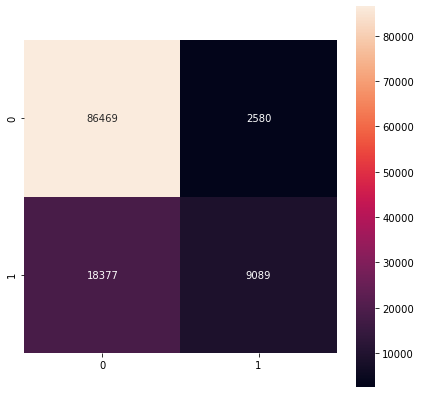

In [12]:
spanish_method('IN',4)

Accuracy Score: 0.9263343500890133
Area Under Curve: 0.6485374350884112
Recall score: 0.3094043887147335

Specificity: 0.9876704814620889
F1 score: 0.43170187639417396
Precision score: 0.7138724142919138
[[158450   1978]
 [ 11015   4935]]

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    160428
           1       0.71      0.31      0.43     15950

    accuracy                           0.93    176378
   macro avg       0.82      0.65      0.70    176378
weighted avg       0.92      0.93      0.91    176378



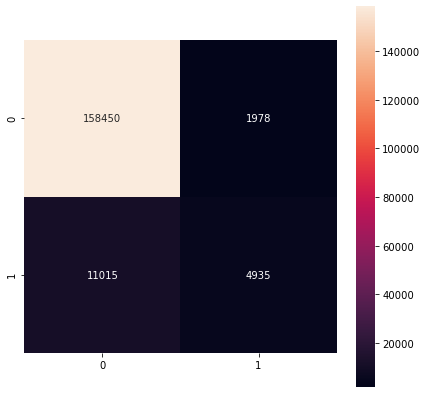

In [13]:
spanish_method('IT',3)

Accuracy Score: 0.9238907346721247
Area Under Curve: 0.6204026501834864
Recall score: 0.24990595611285266

Specificity: 0.9908993442541202
F1 score: 0.3725930080388858
Precision score: 0.7319133308850533
[[158968   1460]
 [ 11964   3986]]

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    160428
           1       0.73      0.25      0.37     15950

    accuracy                           0.92    176378
   macro avg       0.83      0.62      0.67    176378
weighted avg       0.91      0.92      0.91    176378



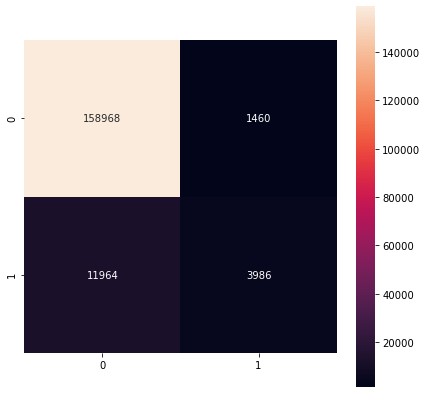

In [14]:
spanish_method('IT',4)

Accuracy Score: 0.9365843263305571
Area Under Curve: 0.6564791975735724
Recall score: 0.3413154533844189

Specificity: 0.9716429417627259
F1 score: 0.37449640917849003
Precision score: 0.41482343810632516
[[51671  1508]
 [ 2063  1069]]

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     53179
           1       0.41      0.34      0.37      3132

    accuracy                           0.94     56311
   macro avg       0.69      0.66      0.67     56311
weighted avg       0.93      0.94      0.93     56311



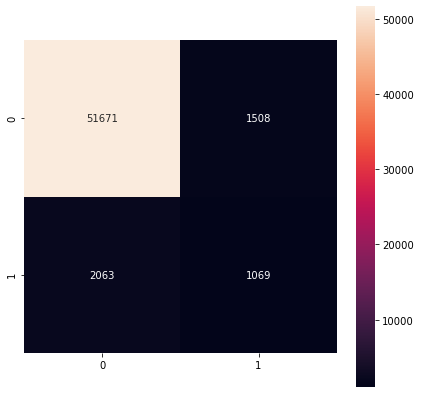

In [15]:
spanish_method('JP',3)

Accuracy Score: 0.9409706806840582
Area Under Curve: 0.6350635923056751
Recall score: 0.2908684546615581

Specificity: 0.9792587299497922
F1 score: 0.35406140691799454
Precision score: 0.45233366434955313
[[52076  1103]
 [ 2221   911]]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     53179
           1       0.45      0.29      0.35      3132

    accuracy                           0.94     56311
   macro avg       0.71      0.64      0.66     56311
weighted avg       0.93      0.94      0.93     56311



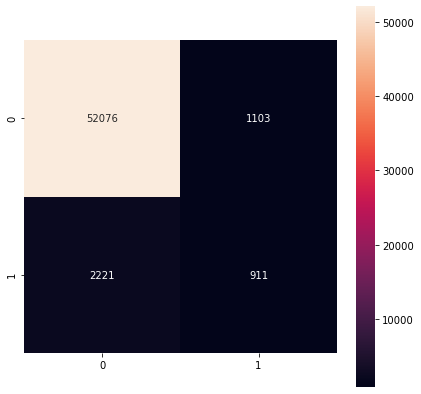

In [16]:
spanish_method('JP',4)

Accuracy Score: 0.8093553362877359
Area Under Curve: 0.7146360170170858
Recall score: 0.4756921204745969

Specificity: 0.9535799135595746
F1 score: 0.6009685602275349
Precision score: 0.8158196806845456
[[108772   5295]
 [ 25851  23454]]

              precision    recall  f1-score   support

           0       0.81      0.95      0.87    114067
           1       0.82      0.48      0.60     49305

    accuracy                           0.81    163372
   macro avg       0.81      0.71      0.74    163372
weighted avg       0.81      0.81      0.79    163372



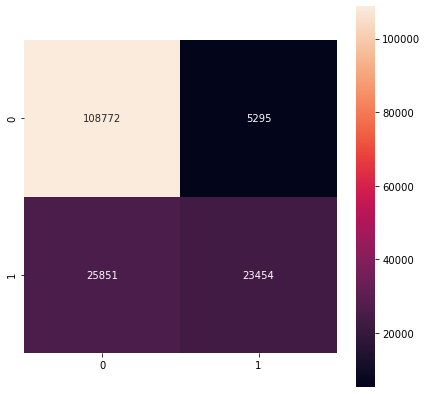

In [17]:
spanish_method('MX',3)

Accuracy Score: 0.7979090664250912
Area Under Curve: 0.6897133374646273
Recall score: 0.4167731467396816

Specificity: 0.9626535281895728
F1 score: 0.5545241115038995
Precision score: 0.8282881212463219
[[109807   4260]
 [ 28756  20549]]

              precision    recall  f1-score   support

           0       0.79      0.96      0.87    114067
           1       0.83      0.42      0.55     49305

    accuracy                           0.80    163372
   macro avg       0.81      0.69      0.71    163372
weighted avg       0.80      0.80      0.77    163372



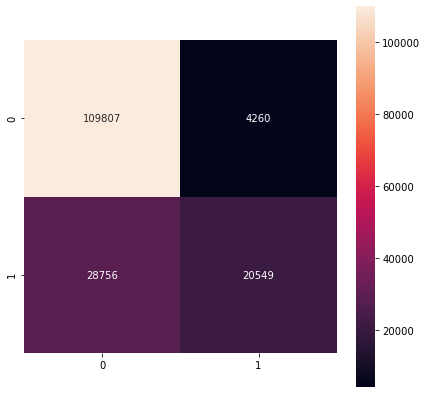

In [18]:
spanish_method('MX',4)